In [286]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


## Loading the dataset

1. Batting: `batting_data.csv`
2. Bowling: `bowling_data.csv`
3. Player Name and ID Map: `player_team_name_id.csv`

In [287]:
batting_df = pd.read_csv('final_data/batting_data.csv')
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number
0,440970,0,-,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,ODI # 3417
1,440970,13*,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,ODI # 3418
2,440970,38*,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487
3,440970,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488
4,440970,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,ODI # 4661
9327,793007,DNB,-,-,-,-,-,-,-,1,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665
9328,793007,0*,12,6,0,0,0.00,11,not out,1,Australia,Lucknow,16 Oct 2023,ODI # 4671
9329,793007,DNB,-,-,-,-,-,-,-,2,Netherlands,Lucknow,21 Oct 2023,ODI # 4676


In [288]:
bowling_df = pd.read_csv('final_data/bowling_data.csv')
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,odi_number
0,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,2 Oct 2013,ODI # 3417
1,440970,DNB,-,-,-,-,-,1,Kenya,Sharjah,4 Oct 2013,ODI # 3418
2,440970,DNB,-,-,-,-,-,1,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487
3,440970,2.0,0,17,0,8.50,6,2,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488
4,440970,DNB,-,-,-,-,-,2,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503
...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,South Africa,Delhi,7 Oct 2023,ODI # 4661
9327,793007,9.2,0,60,2,6.42,2,2,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665
9328,793007,9.0,2,38,3,4.22,2,2,Australia,Lucknow,16 Oct 2023,ODI # 4671
9329,793007,9.4,1,49,4,5.06,1,1,Netherlands,Lucknow,21 Oct 2023,ODI # 4676


In [289]:
player_data_df = pd.read_csv('final_data/player_team_name_id.csv')
player_data_df

,team_name,player_name,player_id
0,Afghanistan,Hashmatullah Shahidi,440970
1,Afghanistan,Rahmanullah Gurbaz,974087
2,Afghanistan,Ibrahim Zadran,921509
3,Afghanistan,Reyaz Hassan,1061090
4,Afghanistan,Rahmat Shah Zurmati,533956
...,...,...,...
145,Sri Lanka,Dunith Wellalage,1152427
146,Sri Lanka,Kasun Rajitha,499594
147,Sri Lanka,Matheesha Pathirana,1194795
148,Sri Lanka,Lahiru Kumara,784375


In [290]:
# Collect Team Names

team_names = player_data_df['team_name'].unique().tolist()
team_names += bowling_df['opposition'].unique().tolist()
team_names += batting_df['Opposition'].unique().tolist()
team_names = list(set(team_names))
team_names

# Encode Team Names

le = LabelEncoder()
le.fit(team_names)
batting_df['Opposition'] = le.transform(batting_df['Opposition'])
bowling_df['opposition'] = le.transform(bowling_df['opposition'])
player_data_df['team_name'] = le.transform(player_data_df['team_name'])


## Data Preprocessing

In [291]:
batting_df = batting_df.merge(player_data_df, on='player_id', how='left')
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number,team_name,player_name
0,440970,0,-,3,0,0,0.00,3,caught,2,9,Sharjah,2 Oct 2013,ODI # 3417,0,Hashmatullah Shahidi
1,440970,13*,-,19,0,0,68.42,5,not out,2,9,Sharjah,4 Oct 2013,ODI # 3418,0,Hashmatullah Shahidi
2,440970,38*,-,67,4,0,56.71,4,not out,2,6,Kuala Lumpur,1 May 2014,ODI # 3487,0,Hashmatullah Shahidi
3,440970,3,-,7,0,0,42.85,4,lbw,1,18,Kuala Lumpur,2 May 2014,ODI # 3488,0,Hashmatullah Shahidi
4,440970,15,21,22,2,0,68.18,4,caught,1,21,Bulawayo,18 Jul 2014,ODI # 3503,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,16,Delhi,7 Oct 2023,ODI # 4661,17,Dilshan Madushanka
9327,793007,DNB,-,-,-,-,-,-,-,1,14,Hyderabad,10 Oct 2023,ODI # 4665,17,Dilshan Madushanka
9328,793007,0*,12,6,0,0,0.00,11,not out,1,1,Lucknow,16 Oct 2023,ODI # 4671,17,Dilshan Madushanka
9329,793007,DNB,-,-,-,-,-,-,-,2,11,Lucknow,21 Oct 2023,ODI # 4676,17,Dilshan Madushanka


In [292]:
batting_df['player_id'].value_counts()
# Valid

253802     286
56029      261
34102      256
56143      244
56025      225
          ... 
721041       4
819507       3
1139520      2
35281        2
379887       2
Name: player_id, Length: 150, dtype: int64

#### Removing unwanted columns

In [293]:
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number,team_name,player_name
0,440970,0,-,3,0,0,0.00,3,caught,2,9,Sharjah,2 Oct 2013,ODI # 3417,0,Hashmatullah Shahidi
1,440970,13*,-,19,0,0,68.42,5,not out,2,9,Sharjah,4 Oct 2013,ODI # 3418,0,Hashmatullah Shahidi
2,440970,38*,-,67,4,0,56.71,4,not out,2,6,Kuala Lumpur,1 May 2014,ODI # 3487,0,Hashmatullah Shahidi
3,440970,3,-,7,0,0,42.85,4,lbw,1,18,Kuala Lumpur,2 May 2014,ODI # 3488,0,Hashmatullah Shahidi
4,440970,15,21,22,2,0,68.18,4,caught,1,21,Bulawayo,18 Jul 2014,ODI # 3503,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,16,Delhi,7 Oct 2023,ODI # 4661,17,Dilshan Madushanka
9327,793007,DNB,-,-,-,-,-,-,-,1,14,Hyderabad,10 Oct 2023,ODI # 4665,17,Dilshan Madushanka
9328,793007,0*,12,6,0,0,0.00,11,not out,1,1,Lucknow,16 Oct 2023,ODI # 4671,17,Dilshan Madushanka
9329,793007,DNB,-,-,-,-,-,-,-,2,11,Lucknow,21 Oct 2023,ODI # 4676,17,Dilshan Madushanka


In [294]:
batting_df.drop(columns=["Mins", "4s", "6s", "SR", "odi_number"], inplace=True)

#### Runs

In [295]:
batting_df['Runs'].unique()

array(['0', '13*', '38*', '3', '15', '11', '31', '32', '72', '14', '21',
       '2*', '12', '23', '54', '2', '34*', '37', '58', '97*', '71', '9',
       '52', '59*', '47', '18', '4', '59', '8', '76', '82', '10', '73',
       '28', '5', '88', '1*', '38', '57', '9*', '22', '15*', '13', '51',
       '80', '48*', '127', '103', '7', '106*', '17', '53', '68', '145',
       '6', '151', '1', '65', '19', '121*', '106', '162', '98', '41*',
       '100', '75', '87', '50', '35', 'DNB', '34', '100*', '26', '16',
       '48', '30', '36', '78', '108*', 'TDNB', '44', '114', '43', '56',
       '69', '29', '33', '113', '62', '46', '24', '61', '103*', '70',
       '94', '55', '45', '77*', '83', '12*', '25', '89*', '81*', '8*',
       '67', '63*', '17*', '42', '20', '104*', '60*', '20*', '3*', '77',
       '7*', '6*', '23*', '60', '41', '46*', '14*', '116', '40', '49',
       '27*', '18*', '92', '64', '27', '50*', '25*', '5*', '86', '19*',
       '16*', '57*', '11*', '35*', '39*', '4*', '0*', '10*', '21*'

In [296]:
# We can notice *, DNB, TDNB, absent in runs

# Replace *23 with 23
batting_df['Runs'].replace(to_replace='\*', value='', regex=True, inplace=True)
batting_df['Runs'].unique()

array(['0', '13', '38', '3', '15', '11', '31', '32', '72', '14', '21',
       '2', '12', '23', '54', '34', '37', '58', '97', '71', '9', '52',
       '59', '47', '18', '4', '8', '76', '82', '10', '73', '28', '5',
       '88', '1', '57', '22', '51', '80', '48', '127', '103', '7', '106',
       '17', '53', '68', '145', '6', '151', '65', '19', '121', '162',
       '98', '41', '100', '75', '87', '50', '35', 'DNB', '26', '16', '30',
       '36', '78', '108', 'TDNB', '44', '114', '43', '56', '69', '29',
       '33', '113', '62', '46', '24', '61', '70', '94', '55', '45', '77',
       '83', '25', '89', '81', '67', '63', '42', '20', '104', '60', '116',
       '40', '49', '27', '92', '64', '86', '39', '117', '85', '99', '128',
       '96', '101', '152', '124', '102', '79', '66', '93', '95', '146',
       '74', '163', '178', '84', '122', '109', '173', '119', '156', '130',
       '179', '107', '166', '134', '105', 'absent', '126', '176', '136',
       '90', '110', '144', '125', '111', '112', 'sub',

In [297]:
# Get Non numeric values

batting_df[~batting_df['Runs'].str.isnumeric()]['Runs'].value_counts()

DNB       1830
TDNB       144
absent       5
sub          1
Name: Runs, dtype: int64

In [298]:
# Remove rows with DNB, TDNB, absent, sub

batting_df.drop(batting_df[batting_df['Runs'].isin(['DNB', 'TDNB', 'absent', 'sub'])].index, inplace=True)
batting_df

,player_id,Runs,BF,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,3,caught,2,9,Sharjah,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,13,19,5,not out,2,9,Sharjah,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,38,67,4,not out,2,6,Kuala Lumpur,1 May 2014,0,Hashmatullah Shahidi
3,440970,3,7,4,lbw,1,18,Kuala Lumpur,2 May 2014,0,Hashmatullah Shahidi
4,440970,15,22,4,caught,1,21,Bulawayo,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,2,11,not out,2,12,Auckland,25 Mar 2023,17,Dilshan Madushanka
9322,793007,1,5,11,not out,1,11,Bulawayo,30 Jun 2023,17,Dilshan Madushanka
9325,793007,0,0,11,not out,1,11,Harare,9 Jul 2023,17,Dilshan Madushanka
9326,793007,4,2,11,not out,2,16,Delhi,7 Oct 2023,17,Dilshan Madushanka


In [299]:
batting_df[~batting_df['Runs'].str.isnumeric()]['Runs'].unique()

array([], dtype=object)

In [300]:
# Change data type of runs to int

batting_df['Runs'] = batting_df['Runs'].astype(int)
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7351 entries, 0 to 9328
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7351 non-null   int64 
 1   Runs         7351 non-null   int64 
 2   BF           7351 non-null   object
 3   Pos          7351 non-null   object
 4   Dismissal    7351 non-null   object
 5   Inns         7351 non-null   object
 6   Opposition   7351 non-null   int64 
 7   Ground       7351 non-null   object
 8   Start        7351 non-null   object
 9   team_name    7351 non-null   int64 
 10  player_name  7351 non-null   object
dtypes: int64(4), object(7)
memory usage: 689.2+ KB


#### Data Type Conversion

In [301]:
batting_df['BF'] = batting_df['BF'].astype(int)

In [302]:
batting_df['Pos'] = batting_df['Pos'].astype(int)

In [303]:
batting_df['Dismissal'].value_counts()

caught            3730
not out           1395
bowled            1082
lbw                602
run out            375
stumped            145
retired notout      15
hit wicket           6
obstruct field       1
Name: Dismissal, dtype: int64

In [304]:
batting_df['Pos'] = batting_df['Pos'].astype(int)

In [305]:
batting_df['Ground'].value_counts()

Mirpur           467
Colombo (RPS)    321
Harare           237
Pallekele        187
The Oval         169
                ... 
Toronto            1
Jamshedpur         1
Gwalior            1
Lincoln            1
Ayr                1
Name: Ground, Length: 128, dtype: int64

In [306]:
# Collect Ground Names

ground_names = batting_df['Ground'].unique().tolist()
ground_names += bowling_df['ground'].unique().tolist()
ground_names = list(set(ground_names))
ground_names

['Castries',
 'Glasgow',
 'Perth',
 'Lucknow',
 'Adelaide',
 'Nelson',
 'Cuttack',
 'Karachi',
 'Dubai (DSC)',
 'Auckland',
 'Eden Gardens',
 'Mount Maunganui',
 'Toronto',
 'Amstelveen',
 "St George's",
 'Nairobi (Gym)',
 'Dambulla',
 'Sylhet',
 'Gqeberha',
 'Nagpur',
 'Sydney',
 'Rajkot',
 'Kingstown',
 'Providence',
 'Paarl',
 'Kanpur',
 'Belfast',
 'Albion',
 'Chennai',
 'Utrecht',
 "Lord's",
 'Ahmedabad',
 'Greater Noida',
 'Hobart',
 'Mohali',
 'Whangarei',
 'Hyderabad',
 'Jaipur',
 'Centurion',
 'Leeds',
 'Southampton',
 'Port of Spain',
 'Bristol',
 'Kuala Lumpur',
 'Wellington',
 'Bulawayo',
 'Aberdeen',
 'Multan',
 'Queenstown',
 'Kingston',
 'Benoni',
 'Abu Dhabi',
 'The Oval',
 'East London',
 'Johannesburg',
 'Thiruvananthapuram',
 'Pune',
 'Rotterdam',
 'Dunedin',
 'Galle',
 'Hamilton',
 'Durban',
 'Brisbane',
 'Bridgetown',
 'Dublin',
 'Dublin (Malahide)',
 'Dehradun',
 'Tarouba',
 'Townsville',
 'Wankhede',
 'Manchester',
 'North Sound',
 'Delhi',
 'Basseterre',
 'Palle

In [307]:
ge = LabelEncoder()
ge.fit(ground_names)
batting_df['Ground'] = ge.transform(batting_df['Ground'])
bowling_df['ground'] = ge.transform(bowling_df['ground'])

In [308]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7351 entries, 0 to 9328
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7351 non-null   int64 
 1   Runs         7351 non-null   int64 
 2   BF           7351 non-null   int64 
 3   Pos          7351 non-null   int64 
 4   Dismissal    7351 non-null   object
 5   Inns         7351 non-null   object
 6   Opposition   7351 non-null   int64 
 7   Ground       7351 non-null   int64 
 8   Start        7351 non-null   object
 9   team_name    7351 non-null   int64 
 10  player_name  7351 non-null   object
dtypes: int64(7), object(4)
memory usage: 689.2+ KB


### Label Encoding

We have already encoded the `team_name`, `ground_name` beforehand to avoid any data integrity issues.

#### Batting Data

In [309]:
dismissal_encoder = LabelEncoder()
dismissal_encoder.fit(batting_df['Dismissal'])
batting_df['Dismissal'] = dismissal_encoder.transform(batting_df['Dismissal'])
batting_df

,player_id,Runs,BF,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,3,1,2,9,109,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,13,19,5,4,2,9,109,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,38,67,4,4,2,6,77,1 May 2014,0,Hashmatullah Shahidi
3,440970,3,7,4,3,1,18,77,2 May 2014,0,Hashmatullah Shahidi
4,440970,15,22,4,1,1,21,19,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,2,11,4,2,12,6,25 Mar 2023,17,Dilshan Madushanka
9322,793007,1,5,11,4,1,11,19,30 Jun 2023,17,Dilshan Madushanka
9325,793007,0,0,11,4,1,11,61,9 Jul 2023,17,Dilshan Madushanka
9326,793007,4,2,11,4,2,16,38,7 Oct 2023,17,Dilshan Madushanka


In [310]:
batting_df['Dismissal'].value_counts()

1    3730
4    1395
0    1082
3     602
7     375
8     145
6      15
2       6
5       1
Name: Dismissal, dtype: int64

## Feature Selection

<Axes: >

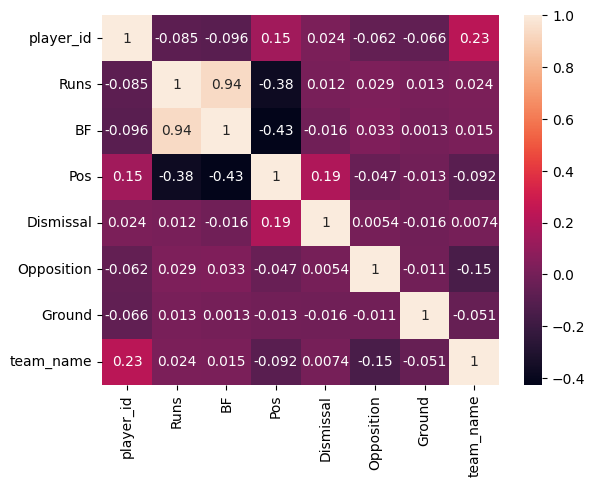

In [311]:
sns.heatmap(batting_df.corr(), annot=True)

From the above heatmap, we can see that Runs and BF are highly correlated. So we can drop one of them

In [312]:
# From the above heatmap, we can see that Runs and BF are highly correlated. So we can drop one of them

batting_df.drop(columns=['BF'], inplace=True)
batting_df

,player_id,Runs,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,1,2,9,109,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,13,5,4,2,9,109,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,38,4,4,2,6,77,1 May 2014,0,Hashmatullah Shahidi
3,440970,3,4,3,1,18,77,2 May 2014,0,Hashmatullah Shahidi
4,440970,15,4,1,1,21,19,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,11,4,2,12,6,25 Mar 2023,17,Dilshan Madushanka
9322,793007,1,11,4,1,11,19,30 Jun 2023,17,Dilshan Madushanka
9325,793007,0,11,4,1,11,61,9 Jul 2023,17,Dilshan Madushanka
9326,793007,4,11,4,2,16,38,7 Oct 2023,17,Dilshan Madushanka


## Classification

### Tasks

1. Predict the type of dismissal of a batsman in a match.

In [313]:
batting_df

,player_id,Runs,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,1,2,9,109,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,13,5,4,2,9,109,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,38,4,4,2,6,77,1 May 2014,0,Hashmatullah Shahidi
3,440970,3,4,3,1,18,77,2 May 2014,0,Hashmatullah Shahidi
4,440970,15,4,1,1,21,19,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,11,4,2,12,6,25 Mar 2023,17,Dilshan Madushanka
9322,793007,1,11,4,1,11,19,30 Jun 2023,17,Dilshan Madushanka
9325,793007,0,11,4,1,11,61,9 Jul 2023,17,Dilshan Madushanka
9326,793007,4,11,4,2,16,38,7 Oct 2023,17,Dilshan Madushanka


In [314]:
batting_df

,player_id,Runs,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,1,2,9,109,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,13,5,4,2,9,109,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,38,4,4,2,6,77,1 May 2014,0,Hashmatullah Shahidi
3,440970,3,4,3,1,18,77,2 May 2014,0,Hashmatullah Shahidi
4,440970,15,4,1,1,21,19,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,11,4,2,12,6,25 Mar 2023,17,Dilshan Madushanka
9322,793007,1,11,4,1,11,19,30 Jun 2023,17,Dilshan Madushanka
9325,793007,0,11,4,1,11,61,9 Jul 2023,17,Dilshan Madushanka
9326,793007,4,11,4,2,16,38,7 Oct 2023,17,Dilshan Madushanka


In [315]:
le.inverse_transform([0,1])

array(['Afghanistan', 'Australia'], dtype='<U12')

In [316]:
x=batting_df.drop(['Runs','Dismissal','Inns','Start','player_name'],axis='columns')
x
y=batting_df['Runs']
y

0        0
1       13
2       38
3        3
4       15
        ..
9321     4
9322     1
9325     0
9326     4
9328     0
Name: Runs, Length: 7351, dtype: int64

In [317]:
x

,player_id,Pos,Opposition,Ground,team_name
0,440970,3,9,109,0
1,440970,5,9,109,0
2,440970,4,6,77,0
3,440970,4,18,77,0
4,440970,4,21,19,0
...,...,...,...,...,...
9321,793007,11,12,6,17
9322,793007,11,11,19,17
9325,793007,11,11,61,17
9326,793007,11,16,38,17


In [318]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [319]:

n=6
m=5
g=109
t=0
o=9


In [320]:
bowling_df

,player_id,overs,maidens,runs,wickets,economy,position,innings,opposition,ground,start_date,odi_number
0,440970,DNB,-,-,-,-,-,1,9,109,2 Oct 2013,ODI # 3417
1,440970,DNB,-,-,-,-,-,1,9,109,4 Oct 2013,ODI # 3418
2,440970,DNB,-,-,-,-,-,1,6,77,1 May 2014,ODI # 3487
3,440970,2.0,0,17,0,8.50,6,2,18,77,2 May 2014,ODI # 3488
4,440970,DNB,-,-,-,-,-,2,21,19,18 Jul 2014,ODI # 3503
...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,10.0,0,86,2,8.60,2,1,16,38,7 Oct 2023,ODI # 4661
9327,793007,9.2,0,60,2,6.42,2,2,14,63,10 Oct 2023,ODI # 4665
9328,793007,9.0,2,38,3,4.22,2,2,1,82,16 Oct 2023,ODI # 4671
9329,793007,9.4,1,49,4,5.06,1,1,11,82,21 Oct 2023,ODI # 4676


In [321]:
bd=batting_df
bd

,player_id,Runs,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,1,2,9,109,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,13,5,4,2,9,109,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,38,4,4,2,6,77,1 May 2014,0,Hashmatullah Shahidi
3,440970,3,4,3,1,18,77,2 May 2014,0,Hashmatullah Shahidi
4,440970,15,4,1,1,21,19,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,11,4,2,12,6,25 Mar 2023,17,Dilshan Madushanka
9322,793007,1,11,4,1,11,19,30 Jun 2023,17,Dilshan Madushanka
9325,793007,0,11,4,1,11,61,9 Jul 2023,17,Dilshan Madushanka
9326,793007,4,11,4,2,16,38,7 Oct 2023,17,Dilshan Madushanka


In [322]:
# le=LabelEncoder()
# le.fit(bd)
# bd['Dismissal']=le.fit_transform(bd['Dismissal'])
# bd
# Assuming bd['Dismissal'] is the column you want to encode
le = LabelEncoder()
bd['Dismissal'] = le.fit_transform(bd['Dismissal'])
bd



,player_id,Runs,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,1,2,9,109,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,13,5,4,2,9,109,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,38,4,4,2,6,77,1 May 2014,0,Hashmatullah Shahidi
3,440970,3,4,3,1,18,77,2 May 2014,0,Hashmatullah Shahidi
4,440970,15,4,1,1,21,19,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,11,4,2,12,6,25 Mar 2023,17,Dilshan Madushanka
9322,793007,1,11,4,1,11,19,30 Jun 2023,17,Dilshan Madushanka
9325,793007,0,11,4,1,11,61,9 Jul 2023,17,Dilshan Madushanka
9326,793007,4,11,4,2,16,38,7 Oct 2023,17,Dilshan Madushanka


<Axes: >

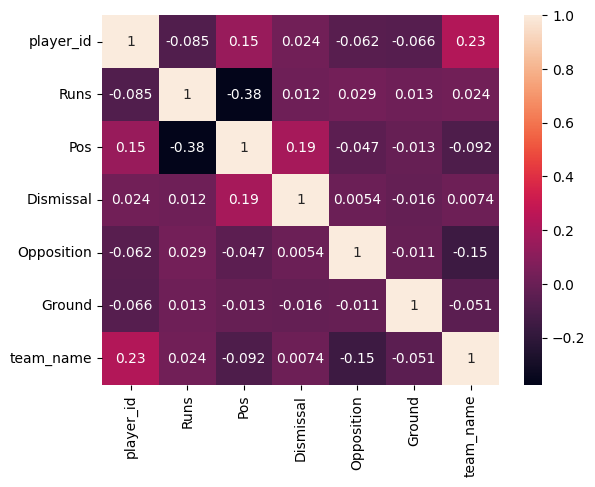

In [323]:
sns.heatmap(batting_df.corr(), annot=True)

In [324]:
x=batting_df.drop(['Runs','Dismissal','Start','team_name','player_name'],axis='columns')
x

,player_id,Pos,Inns,Opposition,Ground
0,440970,3,2,9,109
1,440970,5,2,9,109
2,440970,4,2,6,77
3,440970,4,1,18,77
4,440970,4,1,21,19
...,...,...,...,...,...
9321,793007,11,2,12,6
9322,793007,11,1,11,19
9325,793007,11,1,11,61
9326,793007,11,2,16,38


In [325]:
y=batting_df['Dismissal']
y

0       1
1       4
2       4
3       3
4       1
       ..
9321    4
9322    4
9325    4
9326    4
9328    4
Name: Dismissal, Length: 7351, dtype: int64

In [326]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

### Logistic Regression

In [327]:
from sklearn.linear_model import LogisticRegression 
log_reg=LogisticRegression(solver='lbfgs',random_state=42)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [328]:
# id=int(input())
# pos=int(input())
# inns=int(input())
# opp=int(input())
# ground=int(input())

id=440970
pos=3
inns=2
opp=9
ground=109
print(log_reg.predict([[id,pos,inns,opp,ground]]))


[1]


In [329]:
y_pred=log_reg.predict(x_test)

In [330]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4786944696282865


#### Model Evaluation

##### Confusion Matrix

Text(50.722222222222214, 0.5, 'Truth')

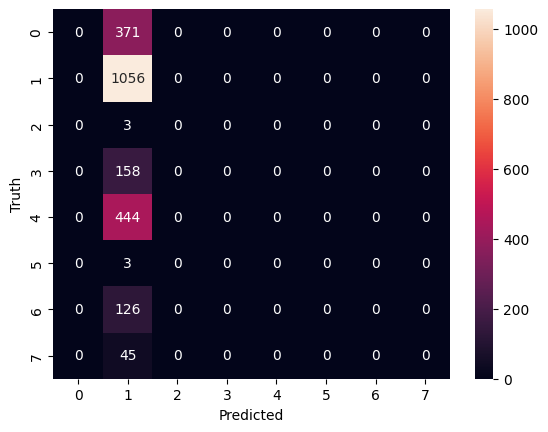

In [331]:
cm=confusion_matrix(y_test,y_pred)
cm

sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Classifcation Report

In [332]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       371
           1       0.48      1.00      0.65      1056
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       158
           4       0.00      0.00      0.00       444
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00       126
           8       0.00      0.00      0.00        45

    accuracy                           0.48      2206
   macro avg       0.06      0.12      0.08      2206
weighted avg       0.23      0.48      0.31      2206



In [333]:
# Class Prediction Error Plot for multiclass classification
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

{0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 6: 0.5, 7: 0.5, 8: 0.5}

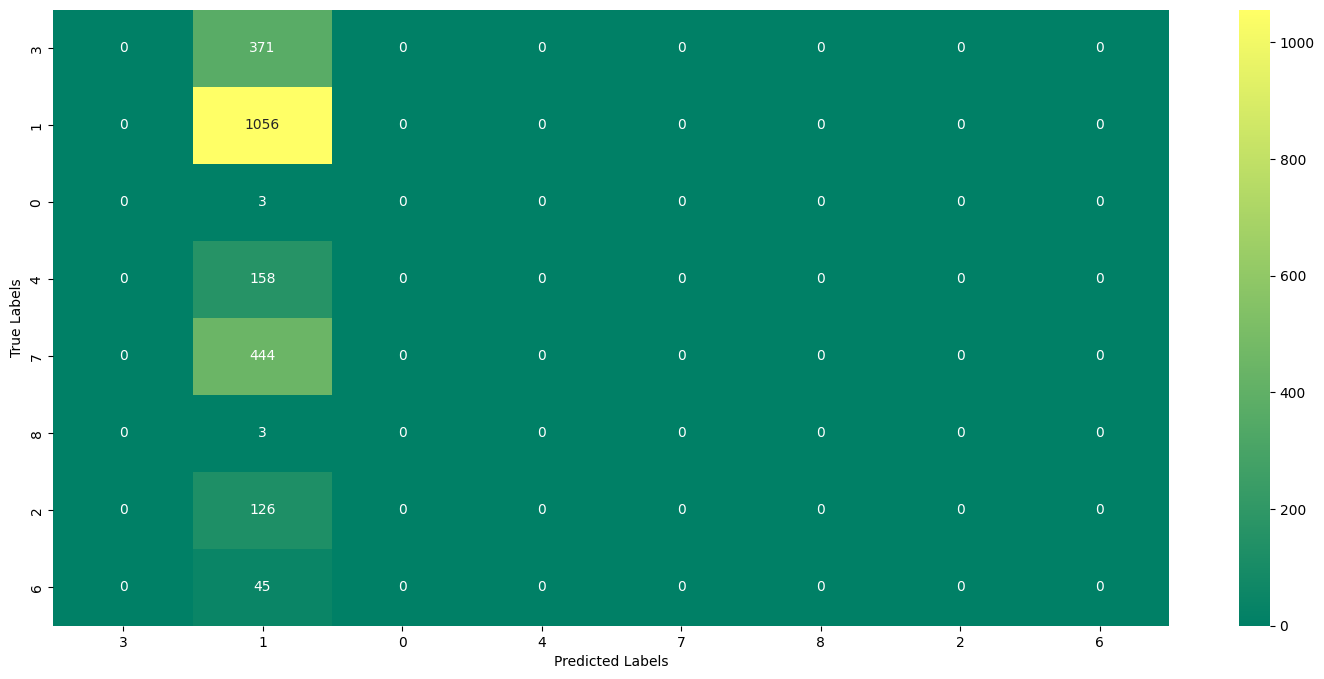

In [334]:
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Decision Tree Classifier

In [335]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [336]:
print(model.predict([[id,pos,inns,opp,ground]]))

[1]


In [337]:
y_pred=model.predict(x_test)

In [338]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.35766092475067995


#### Model Evaluation

Text(50.722222222222214, 0.5, 'Truth')

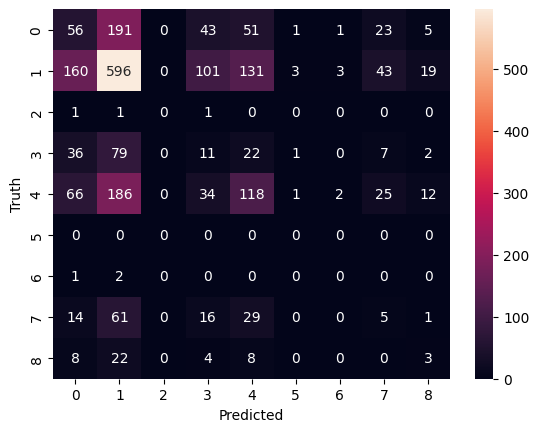

In [339]:
cm=confusion_matrix(y_test,y_pred)
cm

sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [340]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.16      0.15      0.16       371
           1       0.52      0.56      0.54      1056
           2       0.00      0.00      0.00         3
           3       0.05      0.07      0.06       158
           4       0.33      0.27      0.29       444
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           7       0.05      0.04      0.04       126
           8       0.07      0.07      0.07        45

    accuracy                           0.36      2206
   macro avg       0.13      0.13      0.13      2206
weighted avg       0.35      0.36      0.35      2206



In [341]:
# Class Prediction Error Plot for multiclass classification
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

{0: 0.4975278538745713,
 1: 0.5466609025032939,
 2: 0.49863822060826146,
 3: 0.4881699960443038,
 4: 0.5642019715515744,
 6: 0.4972764412165229,
 7: 0.49484126984126986,
 8: 0.5229214869659108}

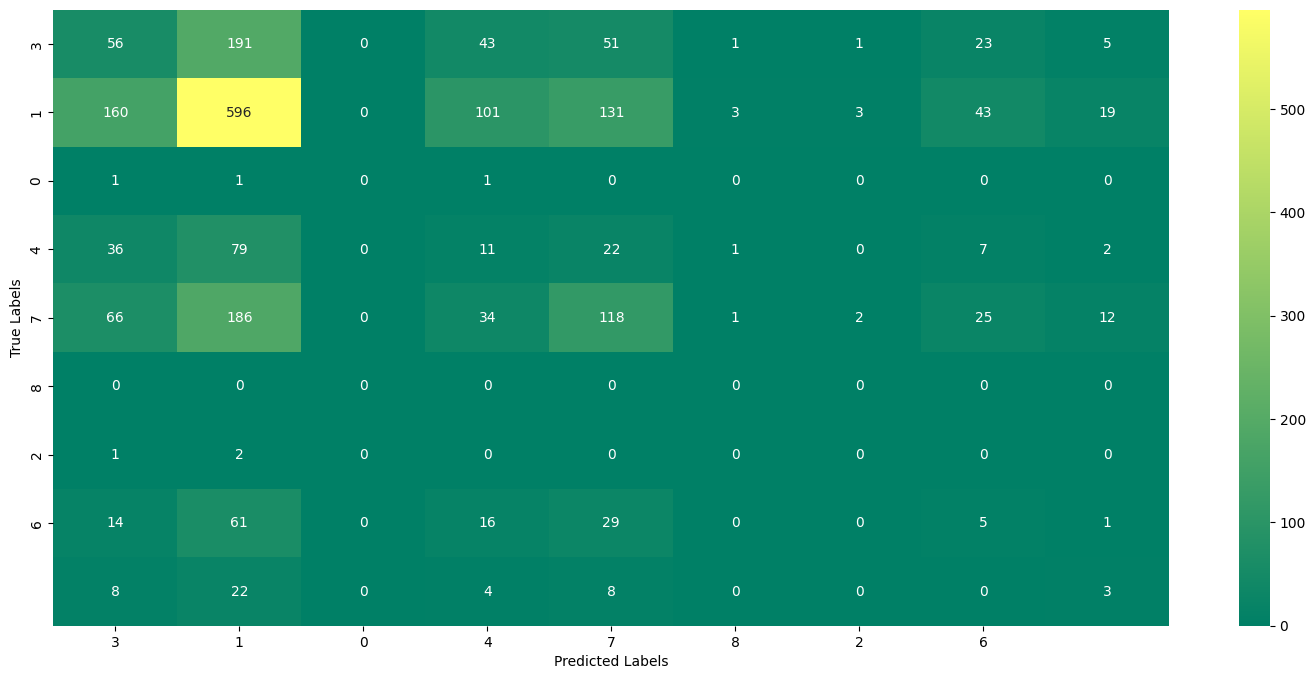

In [342]:
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Random Forest Classifier

In [343]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [344]:
y_pred = clf.predict(x_test)

In [345]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5036264732547597


#### Model Evaluation

Text(50.722222222222214, 0.5, 'Truth')

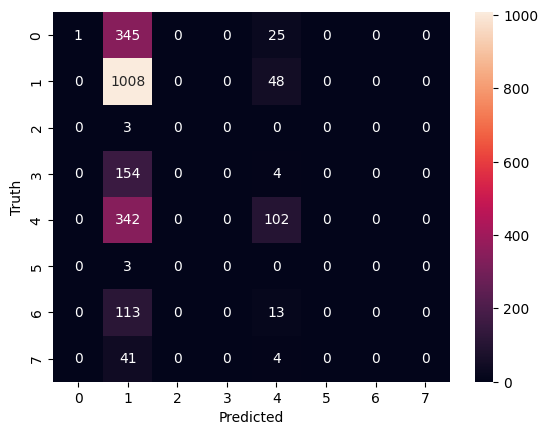

In [346]:
cm=confusion_matrix(y_test,y_pred)
cm

sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [347]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       371
           1       0.50      0.95      0.66      1056
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       158
           4       0.52      0.23      0.32       444
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00       126
           8       0.00      0.00      0.00        45

    accuracy                           0.50      2206
   macro avg       0.25      0.15      0.12      2206
weighted avg       0.51      0.50      0.38      2206



In [348]:
# Class Prediction Error Plot for multiclass classification
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

{0: 0.5013477088948787,
 1: 0.5420553359683794,
 2: 0.5,
 3: 0.5,
 4: 0.5881906310396663,
 6: 0.5,
 7: 0.5,
 8: 0.5}

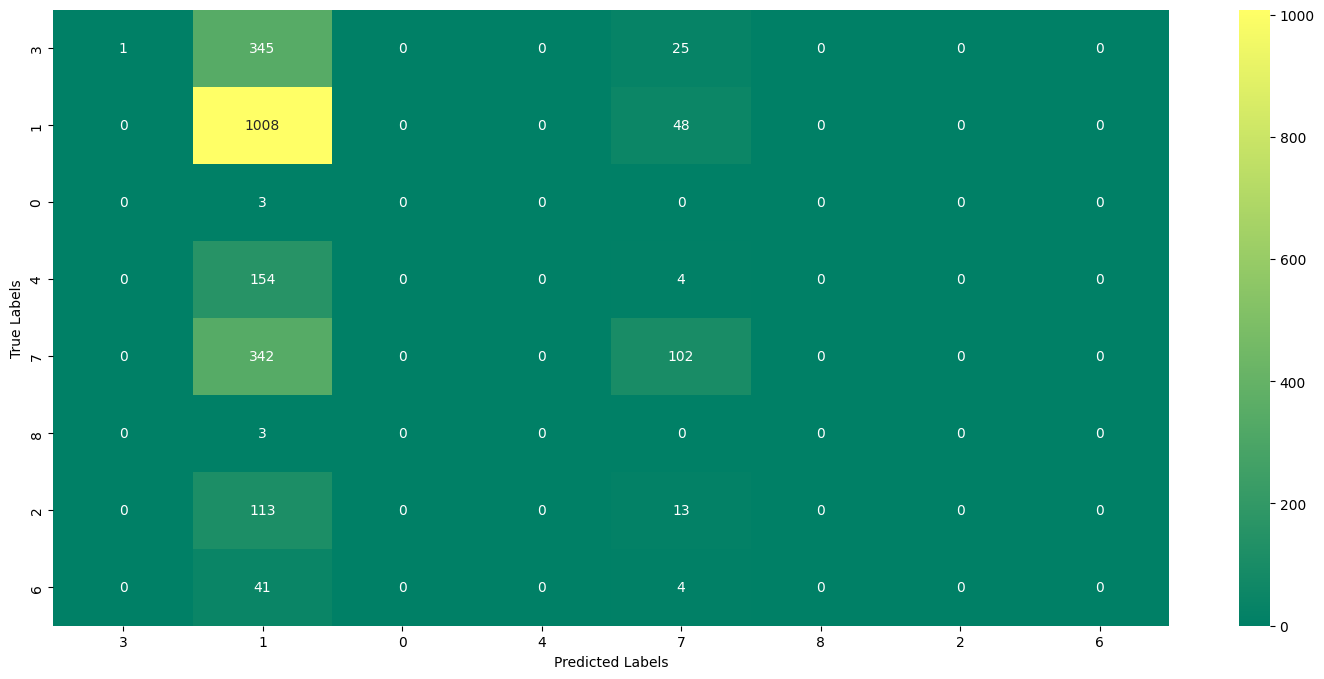

In [349]:
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [350]:
# id=int(input())
# pos=int(input())
# inns=int(input())
# opp=int(input())
# ground=int(input())

id=440970
pos=3
inns=2
opp=9
ground=109



### Player Specific Prediction

In [351]:
df=bd[batting_df['player_id']==id]
df

,player_id,Runs,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,1,2,9,109,2 Oct 2013,0,Hashmatullah Shahidi
1,440970,13,5,4,2,9,109,4 Oct 2013,0,Hashmatullah Shahidi
2,440970,38,4,4,2,6,77,1 May 2014,0,Hashmatullah Shahidi
3,440970,3,4,3,1,18,77,2 May 2014,0,Hashmatullah Shahidi
4,440970,15,4,1,1,21,19,18 Jul 2014,0,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...
64,440970,18,4,1,1,2,40,7 Oct 2023,0,Hashmatullah Shahidi
65,440970,80,4,3,1,7,38,11 Oct 2023,0,Hashmatullah Shahidi
66,440970,14,4,0,1,5,38,15 Oct 2023,0,Hashmatullah Shahidi
67,440970,8,4,1,2,12,28,18 Oct 2023,0,Hashmatullah Shahidi


In [352]:
x=df.drop(['Runs','Dismissal','Start','team_name','player_name'],axis='columns')
x

,player_id,Pos,Inns,Opposition,Ground
0,440970,3,2,9,109
1,440970,5,2,9,109
2,440970,4,2,6,77
3,440970,4,1,18,77
4,440970,4,1,21,19
...,...,...,...,...,...
64,440970,4,1,2,40
65,440970,4,1,7,38
66,440970,4,1,5,38
67,440970,4,2,12,28


In [353]:
y=df['Dismissal']
y

0     1
1     4
2     4
3     3
4     1
     ..
64    1
65    3
66    0
67    1
68    4
Name: Dismissal, Length: 69, dtype: int64

In [354]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10)

#### Logistic Regression

In [355]:
from sklearn.linear_model import LogisticRegression 
log_reg=LogisticRegression(solver='lbfgs',random_state=42)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [356]:
y_pred=log_reg.predict(x_test)

In [357]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5714285714285714


In [358]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5714285714285714


##### Model Evaluation

Text(50.722222222222214, 0.5, 'Truth')

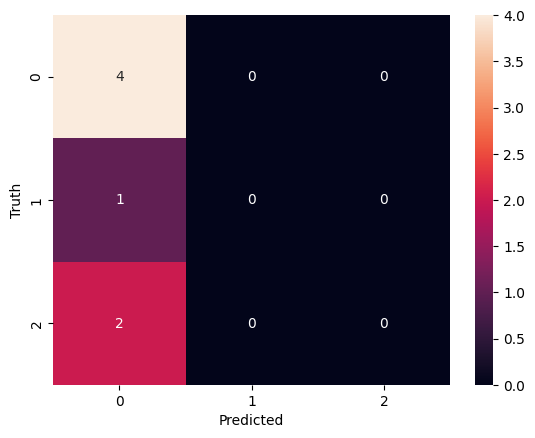

In [359]:
cm=confusion_matrix(y_test,y_pred)
cm

sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [360]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.57         7
   macro avg       0.19      0.33      0.24         7
weighted avg       0.33      0.57      0.42         7



In [361]:
# Class Prediction Error Plot for multiclass classification
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

{1: 0.5, 3: 0.5, 4: 0.5}

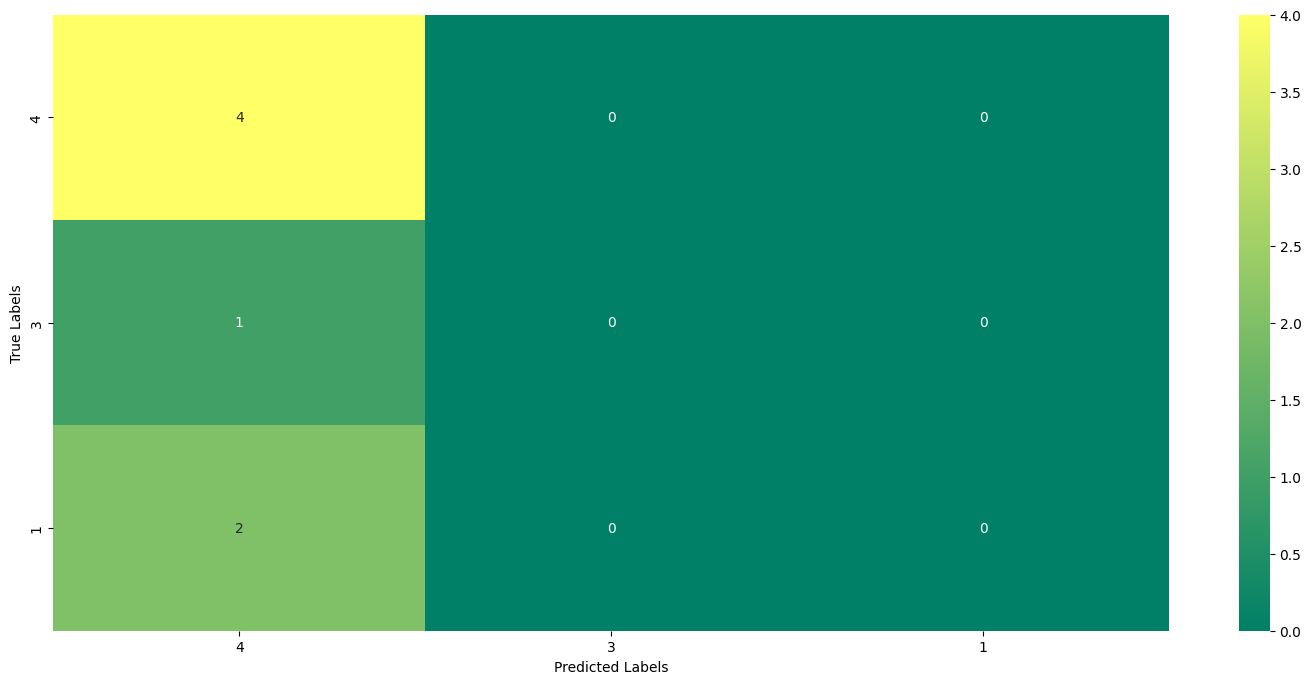

In [362]:
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Random Forest Classifier

In [363]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [364]:
y_pred = clf.predict(x_test)

In [365]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.42857142857142855


##### Model Evaluation

Text(50.722222222222214, 0.5, 'Truth')

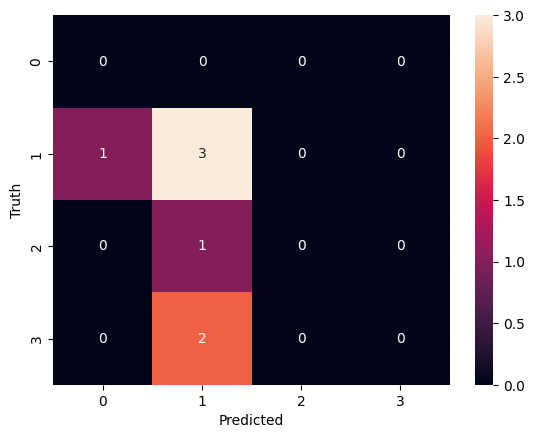

In [366]:
cm=confusion_matrix(y_test,y_pred)
cm

sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [367]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.75      0.60         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.43         7
   macro avg       0.12      0.19      0.15         7
weighted avg       0.29      0.43      0.34         7



In [368]:
# Class Prediction Error Plot for multiclass classification
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

{1: 0.5, 3: 0.4166666666666667, 4: 0.4}

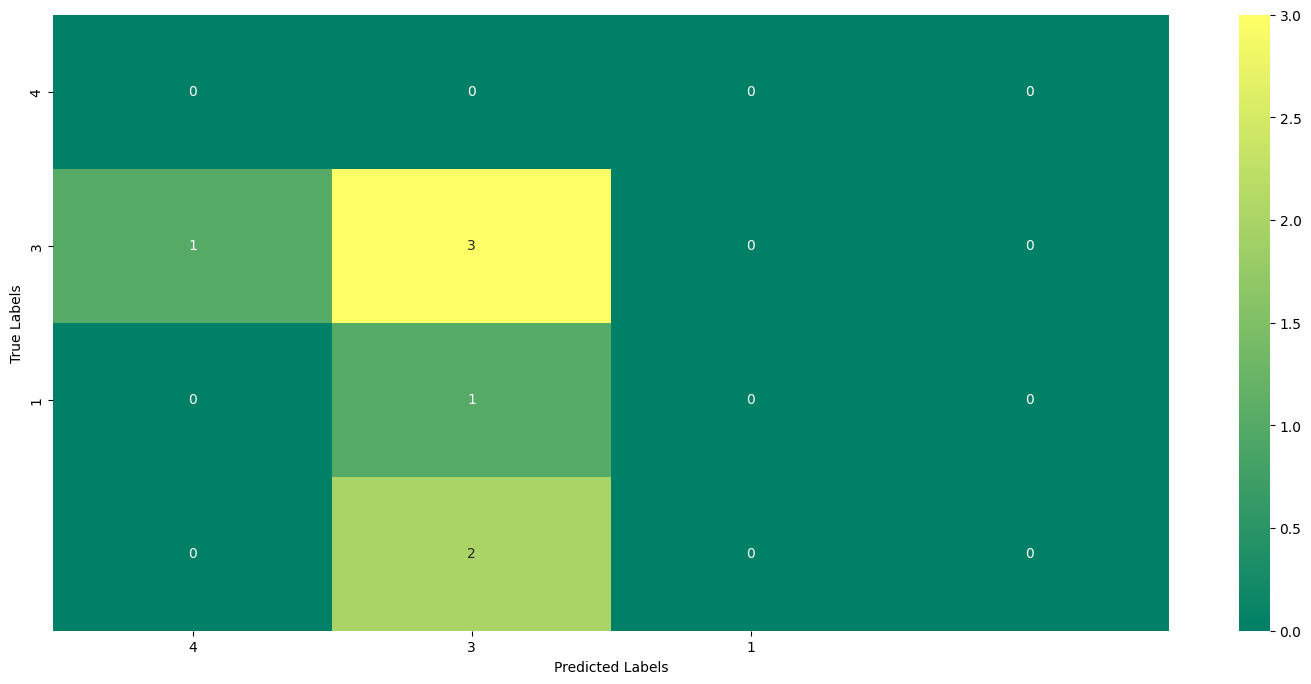

In [369]:
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Hyperparameter Tuning

In [370]:
from scipy.stats import randint

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [371]:
from sklearn.model_selection import RandomizedSearchCV
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
 
tree_cv.fit(x, y)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 6}
Best score is 0.49230769230769234


### Logistic Regression

In [372]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(x, y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.49230769230769234


Text(50.722222222222214, 0.5, 'Truth')

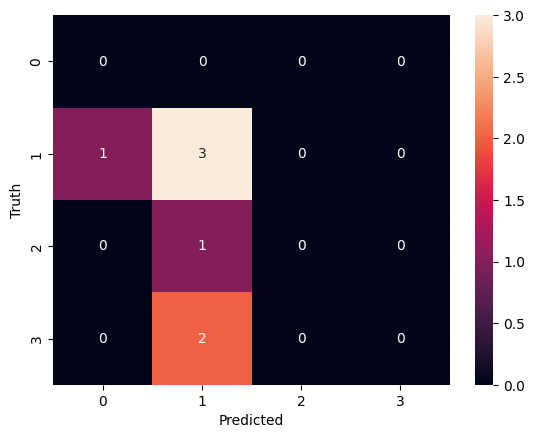

In [373]:
cm=confusion_matrix(y_test,y_pred)
cm

sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [374]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      0.75      0.60         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.43         7
   macro avg       0.12      0.19      0.15         7
weighted avg       0.29      0.43      0.34         7



In [375]:
# Class Prediction Error Plot for multiclass classification
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    # creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        # creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        # marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

{1: 0.5, 3: 0.4166666666666667, 4: 0.4}

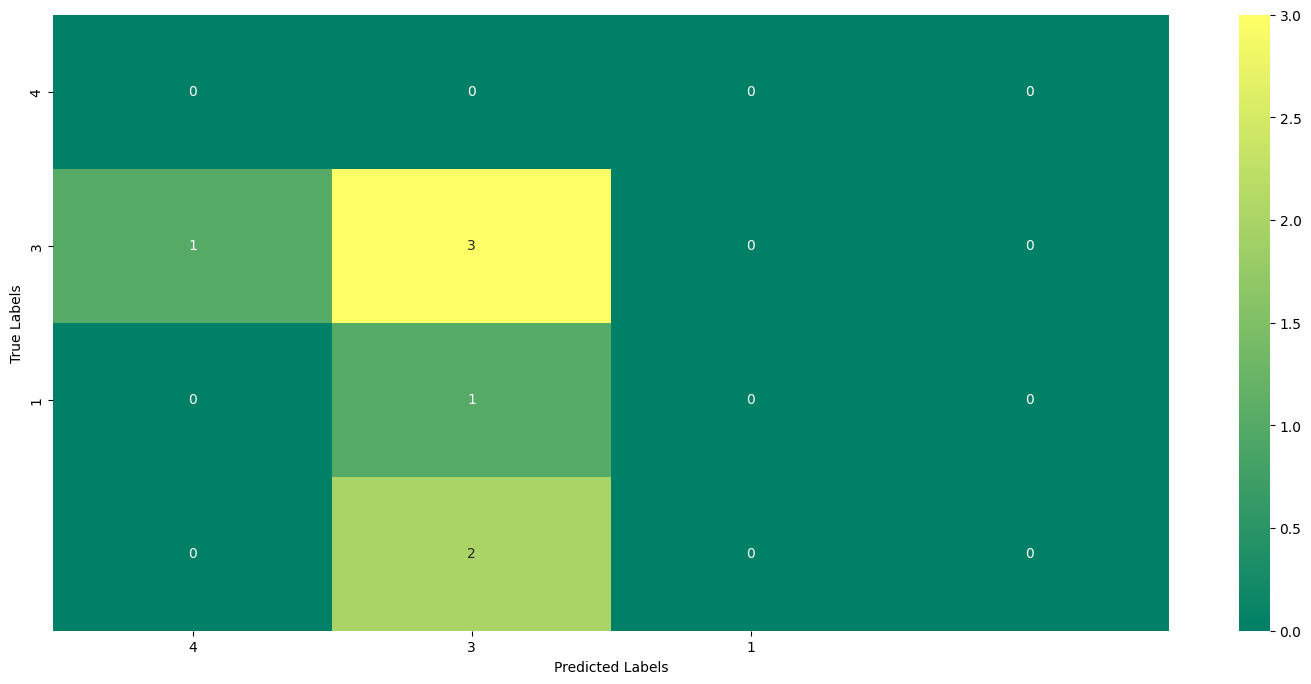

In [376]:
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Support Vector Machines

In [377]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
 
# Load the datasets

 
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(x_train,y_train)

y_pred=svm.predict(x_test)
print(f"accuracy: {accuracy_score(y_test,y_pred)}")

accuracy: 0.5714285714285714


Text(50.722222222222214, 0.5, 'Truth')

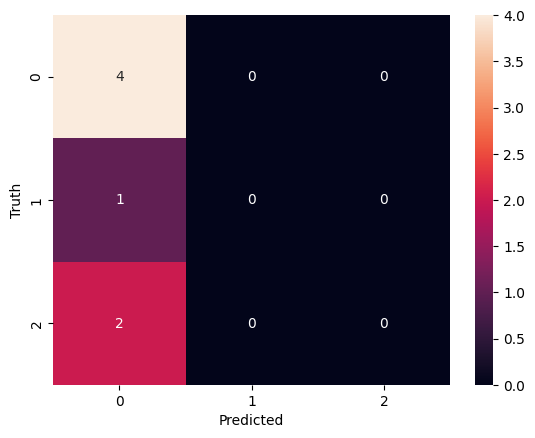

In [378]:
cm=confusion_matrix(y_test,y_pred)
cm

sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [379]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.57         7
   macro avg       0.19      0.33      0.24         7
weighted avg       0.33      0.57      0.42         7



In [380]:
# Class Prediction Error Plot for multiclass classification
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

{1: 0.5, 3: 0.5, 4: 0.5}

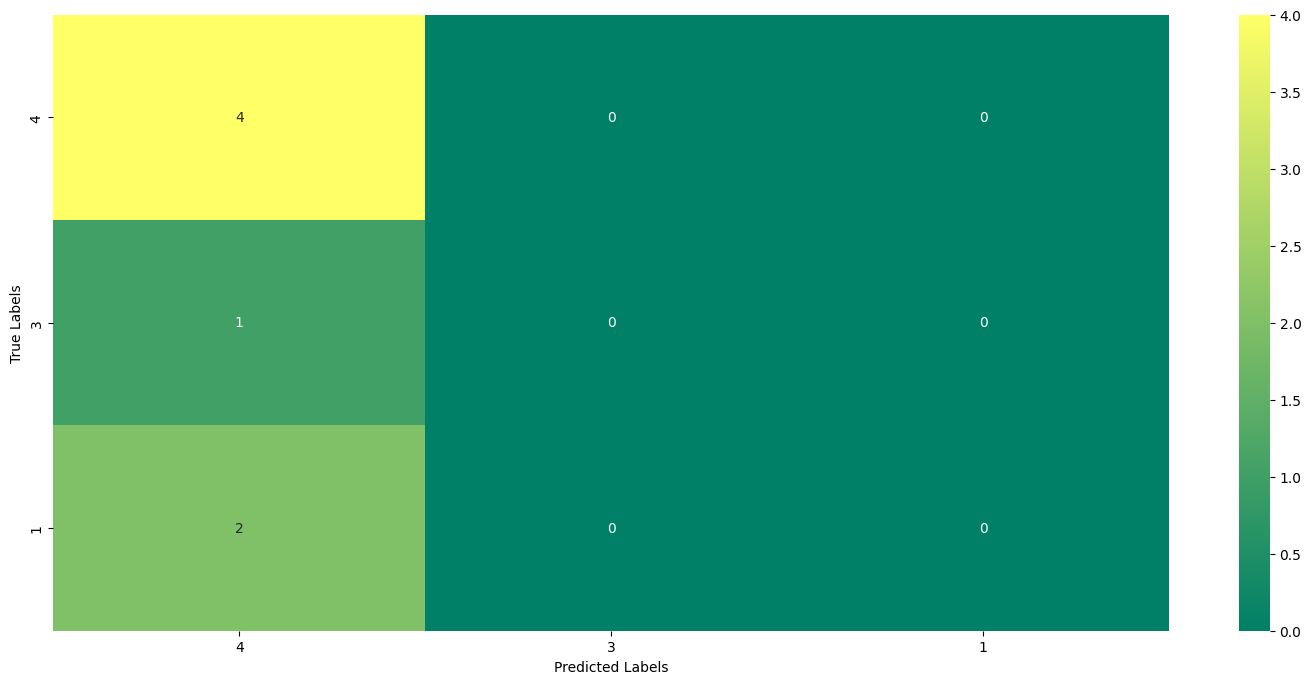

In [381]:
plt.figure(figsize = (18,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()